In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data

|  Plant     |  1 |  2 |  3 |
|-------|---------|---------|---------|
| $c_j$ | 0.00006 | 0.00002 | 0.00003 |
|$p_j$ T/d| 220 | 160 | 180 |

### Definitions

* $i$ - Day Index $i \in [1,2,...,20]$
* $j$ - Plant Index $j \in [1,2,3]$
* $p_j$ - Process capacity of plant $j$
* $x_i^j$ - Ammount of beets processed at day i by Plant j
* $s_i$ - Ammount of beets stored at day i
* $L_j(x^j_i)$ - Losses from the storage of beets accepted for processing on day $i$ at plant $j$

### Minimize

$$ \sum_{i=1}^{20} \sum_{j=1}^{3} L_j(x^j_i) $$

Where

$$  L_j(x^j_i) = c_j x^j_i \frac{ t^j_i + t^j_{i+1}- 2i}{2} $$

$$ t^j_{i+1} = t^j_{i} + \frac{x^j_{i}}{p_j} $$

### Constrains

$$ \sum_{j=1}^3 x_i^j + s_{i} = s_{i-1} + 800$$

$$ \sum_{i=1}^{20} \sum_{j=1}^{3} x^j_i + s_{20} = 16000 $$

$$ 0 \leq x_i \leq p_i \quad \forall i,j$$

$$ 0 \leq s_i \quad \forall i$$

$$ s_0 = 0 $$



In [ ]:
# Constants
c = np.array([0.00006, 0.00002, 0.00003]) 
p = np.array([220, 160, 180]) 
number_days = 20
number_pants = 3  
total_demand = 16000

def Loss(vars):
    x = vars[:number_days * number_pants].reshape(number_days, number_pants)
    L = 0
    t = np.zeros((number_days + 1, number_pants))
    for j in range(number_pants):
        for i in range(number_days):
            t[i+1, j] = t[i, j] + x[i, j] / p[j] + 1
            L += .5 * c[j] * x[i, j] * (t[i, j] + t[i+1, j] - 2 * (i + 1)) 
    return L

def constraint_1(vars):
    x = vars[:number_days * number_pants].reshape(number_days, number_pants)
    s = vars[number_days * number_pants:]
    constraints = []
    s_prev = 0
    for i in range(number_days):
        constraints.append(np.sum(x[i, :]) + s[i] - (s_prev + 800))
        s_prev = s[i]
    return constraints

def constraint_2(vars):
    x = vars[:number_days * number_pants].reshape(number_days, number_pants)
    s = vars[number_days * number_pants:]
    return np.sum(x) + s[-1] - total_demand

# Bounds
bounds_x = [(0, p[j]) for _ in range(number_days) for j in range(number_pants) ]
bounds_s = [(0, None) for _ in range(number_days)]
bounds = bounds_x + bounds_s

# Initial guess
x0 = np.zeros(number_days * number_pants + number_days)

constraints = [
    {'type': 'eq', 'fun': constraint_1},
    {'type': 'eq', 'fun': constraint_2},
]

result = minimize(Loss, x0, method = 'SLSQP' , bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.1941985462298073
       x: [ 1.673e+02  1.095e+02 ...  6.063e+03  6.303e+03]
     nit: 13
     jac: [ 1.048e-03  3.095e-04 ...  0.000e+00  0.000e+00]
    nfev: 1063
    njev: 13

In [10]:
Plants = result.x[:number_days * number_pants].reshape((number_days,number_pants))
Stock = result.x[number_days * number_pants:]

In [13]:
Loss(result.x)

3.1941985462298073

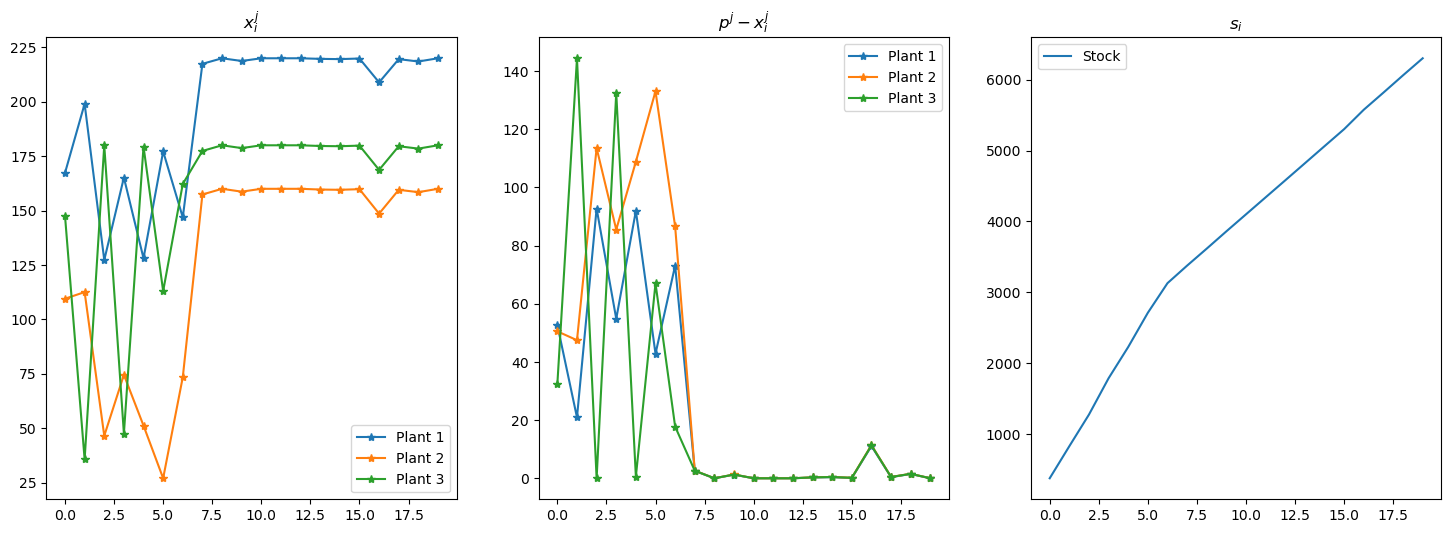

In [12]:
fig , axs = plt.subplots( 1,3 , figsize=(18, 6) )

axs[0].plot( Plants[:,0] , "-*" ,label = "Plant 1" )
axs[0].plot( Plants[:,1] , "-*" , label = "Plant 2" )
axs[0].plot( Plants[:,2] , "-*" , label = "Plant 3" )
axs[0].set_title("$x_i^j$")
axs[0].legend()

axs[1].plot( p[0] - Plants[:,0] , "-*", label = "Plant 1" )
axs[1].plot( p[1] - Plants[:,1] , "-*", label = "Plant 2" )
axs[1].plot( p[2] - Plants[:,2] , "-*", label = "Plant 3" )
axs[1].set_title("$p^j - x^j_i$")
axs[1].legend()


axs[2].plot( Stock , label = "Stock")
axs[2].set_title("$s_i$")
axs[2].legend()

In [5]:
Plants

array([[218.93690002, 158.71894788,   3.8405686 ],
       [218.13895217, 159.76075309, 179.31668891],
       [ 77.13360305, 152.54622397, 178.85117222],
       [219.15771122, 159.85224799, 180.        ],
       [220.        , 159.4851662 , 180.        ],
       [216.01767106, 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [220.        , 160.        , 180.        ],
       [219.99503252, 159.9943129 , 179.99460756],
       [220.        , 160.        , 180.        ],
       [219.908197  , 159.90747739, 179.90777204],
       [218.29779879, 156.68676

In [17]:
Stock

array([ 375.62647035,  828.45032331, 1274.71629268, 1787.61009078,
       2228.96279283, 2711.86185298, 3129.35192499, 3377.11101112,
       3617.11101112, 3860.95139557, 4100.95139557, 4340.95139557,
       4580.95139557, 4821.87786615, 5063.1510864 , 5303.58176331,
       5577.37001972, 5818.66861274, 6063.21386139, 6303.21386139])

In [6]:
Plants.sum() + Stock[-1]

16000.000000000002